乐学偶得版权所有 lexueoude.com 公众号：乐学Fintech

如果要进行计算BBand指标，必须要知道两个信息：
MA + Kσ
MA − Kσ

1）MA（移动平均，很多时候我们用的是SMA）
2）σ标准差(移动平均的标准差)

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt



pro=ts.pro_api()
df_whole=pro.daily(ts_code="000001.SZ",start_date="20170101",end_date="20190630")
df_whole.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20190628,13.73,13.79,13.58,13.78,13.71,0.07,0.5106,498093.69,682679.970
1,000001.SZ,20190627,13.50,13.85,13.45,13.71,13.37,0.34,2.5430,925074.94,1270042.461
2,000001.SZ,20190626,13.27,13.50,13.19,13.37,13.29,0.08,0.6020,546504.76,731207.282
3,000001.SZ,20190625,13.72,13.72,13.07,13.43,13.69,-0.26,-1.8992,1469227.07,1954855.785
4,000001.SZ,20190624,13.69,13.83,13.61,13.69,13.64,0.05,0.3666,659572.85,904433.349


In [2]:
df_whole["trade_date"]=pd.to_datetime(df_whole["trade_date"],format="%Y%m%d")
df_whole["trade_date"]

0     2019-06-28
1     2019-06-27
2     2019-06-26
3     2019-06-25
4     2019-06-24
5     2019-06-21
6     2019-06-20
7     2019-06-19
8     2019-06-18
9     2019-06-17
10    2019-06-14
11    2019-06-13
12    2019-06-12
13    2019-06-11
14    2019-06-10
15    2019-06-06
16    2019-06-05
17    2019-06-04
18    2019-06-03
19    2019-05-31
20    2019-05-30
21    2019-05-29
22    2019-05-28
23    2019-05-27
24    2019-05-24
25    2019-05-23
26    2019-05-22
27    2019-05-21
28    2019-05-20
29    2019-05-17
         ...    
575   2017-02-20
576   2017-02-17
577   2017-02-16
578   2017-02-15
579   2017-02-14
580   2017-02-13
581   2017-02-10
582   2017-02-09
583   2017-02-08
584   2017-02-07
585   2017-02-06
586   2017-02-03
587   2017-01-26
588   2017-01-25
589   2017-01-24
590   2017-01-23
591   2017-01-20
592   2017-01-19
593   2017-01-18
594   2017-01-17
595   2017-01-16
596   2017-01-13
597   2017-01-12
598   2017-01-11
599   2017-01-10
600   2017-01-09
601   2017-01-06
602   2017-01-

In [3]:
df_whole.set_index("trade_date",inplace=True)
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-06-28,000001.SZ,13.73,13.79,13.58,13.78,13.71,0.07,0.5106,498093.69,682679.970
2019-06-27,000001.SZ,13.50,13.85,13.45,13.71,13.37,0.34,2.5430,925074.94,1270042.461
2019-06-26,000001.SZ,13.27,13.50,13.19,13.37,13.29,0.08,0.6020,546504.76,731207.282
2019-06-25,000001.SZ,13.72,13.72,13.07,13.43,13.69,-0.26,-1.8992,1469227.07,1954855.785
2019-06-24,000001.SZ,13.69,13.83,13.61,13.69,13.64,0.05,0.3666,659572.85,904433.349


In [4]:
df_whole=df_whole.sort_index(ascending=True)
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2017-01-03,000001.SZ,9.11,9.18,9.09,9.16,9.10,0.06,0.66,459840.49,420595.176
2017-01-04,000001.SZ,9.15,9.18,9.14,9.16,9.16,0.00,0.00,449329.53,411503.444
2017-01-05,000001.SZ,9.17,9.18,9.15,9.17,9.16,0.01,0.11,344372.91,315769.693
2017-01-06,000001.SZ,9.17,9.17,9.11,9.13,9.17,-0.04,-0.44,358154.20,327176.433
2017-01-09,000001.SZ,9.13,9.17,9.11,9.15,9.13,0.02,0.22,361081.57,329994.604


In [5]:
symbol="000001.SZ"
df=df_whole["close"]
df.head()

trade_date
2017-01-03    9.16
2017-01-04    9.16
2017-01-05    9.17
2017-01-06    9.13
2017-01-09    9.15
Name: close, dtype: float64

In [6]:
sma=df.rolling(window=20).mean()
sma

trade_date
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
2017-01-09        NaN
2017-01-10        NaN
2017-01-11        NaN
2017-01-12        NaN
2017-01-13        NaN
2017-01-16        NaN
2017-01-17        NaN
2017-01-18        NaN
2017-01-19        NaN
2017-01-20        NaN
2017-01-23        NaN
2017-01-24        NaN
2017-01-25        NaN
2017-01-26        NaN
2017-02-03        NaN
2017-02-06     9.1940
2017-02-07     9.2010
2017-02-08     9.2080
2017-02-09     9.2150
2017-02-10     9.2250
2017-02-13     9.2380
2017-02-14     9.2505
2017-02-15     9.2660
2017-02-16     9.2815
2017-02-17     9.2930
2017-02-20     9.3140
               ...   
2019-05-17    13.4105
2019-05-20    13.3120
2019-05-21    13.2230
2019-05-22    13.1065
2019-05-23    13.0135
2019-05-24    12.9275
2019-05-27    12.8240
2019-05-28    12.7420
2019-05-29    12.6725
2019-05-30    12.5785
2019-05-31    12.4950
2019-06-03    12.4465
2019-06-04    12.3915
2019-06-05    12.3600

In [7]:
# rolling standard deviation
rstd=df.rolling(window=20).std()
rstd

trade_date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-16         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-02-03         NaN
2017-02-06    0.060819
2017-02-07    0.064637
2017-02-08    0.067481
2017-02-09    0.070524
2017-02-10    0.072001
2017-02-13    0.080694
2017-02-14    0.085562
2017-02-15    0.092304
2017-02-16    0.097672
2017-02-17    0.096141
2017-02-20    0.106297
                ...   
2019-05-17    0.849002
2019-05-20    0.848544
2019-05-21    0.828150
2019-05-22    0.766594
2019-05-23    0.745882
2019-05-24    0.716225
2019-05-27    0.630600
2019-05-28    0.553787
2019-05-29    0.499946
2019-05-30    0.379699
2019-05-31    0.245153
2019-06-03    0.262403


In [8]:
upper_band=sma+ 2 * rstd
upper_band

trade_date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09          NaN
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-16          NaN
2017-01-17          NaN
2017-01-18          NaN
2017-01-19          NaN
2017-01-20          NaN
2017-01-23          NaN
2017-01-24          NaN
2017-01-25          NaN
2017-01-26          NaN
2017-02-03          NaN
2017-02-06     9.315638
2017-02-07     9.330273
2017-02-08     9.342962
2017-02-09     9.356049
2017-02-10     9.369003
2017-02-13     9.399389
2017-02-14     9.421623
2017-02-15     9.450608
2017-02-16     9.476843
2017-02-17     9.485283
2017-02-20     9.526593
                ...    
2019-05-17    15.108505
2019-05-20    15.009089
2019-05-21    14.879300
2019-05-22    14.639688
2019-05-23    14.505264
2019-05-24    14.359949
2019-05-27    14.085201
2019-05-28    13.849574
2019-05-29    13.672392
2019-05-30    13.337898
2019-

In [9]:
type(upper_band)

pandas.core.series.Series

In [10]:
upper_band=upper_band.to_frame()
type(upper_band)

pandas.core.frame.DataFrame

In [11]:
upper_band

,close
trade_date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
2017-01-10,NaN
2017-01-11,NaN
2017-01-12,NaN
2017-01-13,NaN


In [12]:
upper_band=upper_band.rename({"close":"upper"},axis=1)
upper_band

,upper
trade_date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
2017-01-10,NaN
2017-01-11,NaN
2017-01-12,NaN
2017-01-13,NaN


In [13]:
lower_band=sma- 2 * rstd
lower_band=lower_band.to_frame()
lower_band=lower_band.rename({"close":"lower"},axis=1)
lower_band

,lower
trade_date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
2017-01-10,NaN
2017-01-11,NaN
2017-01-12,NaN
2017-01-13,NaN


In [17]:
BB_df=pd.concat([df,upper_band,lower_band],axis=1)
BB_df.dropna(inplace=True)
print(BB_df)

            close      upper      lower
trade_date                             
2017-02-06   9.31   9.315638   9.072362
2017-02-07   9.30   9.330273   9.071727
2017-02-08   9.30   9.342962   9.073038
2017-02-09   9.31   9.356049   9.073951
2017-02-10   9.33   9.369003   9.080997
2017-02-13   9.41   9.399389   9.076611
2017-02-14   9.40   9.421623   9.079377
2017-02-15   9.45   9.450608   9.081392
2017-02-16   9.46   9.476843   9.086157
2017-02-17   9.39   9.485283   9.100717
2017-02-20   9.56   9.526593   9.101407
2017-02-21   9.57   9.561878   9.108122
2017-02-22   9.57   9.590975   9.119025
2017-02-23   9.51   9.602039   9.140961
2017-02-24   9.50   9.611260   9.159740
2017-02-27   9.43   9.608494   9.183506
2017-02-28   9.48   9.613460   9.199540
2017-03-01   9.49   9.616054   9.219946
2017-03-02   9.43   9.616701   9.229299
2017-03-03   9.40   9.608414   9.251586
2017-03-06   9.45   9.606345   9.267655
2017-03-07   9.45   9.601105   9.287895
2017-03-08   9.42   9.592289   9.308711


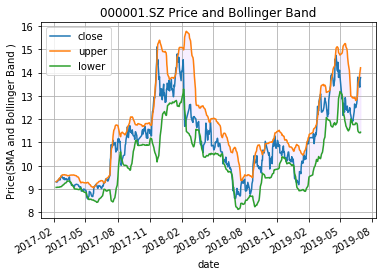

In [38]:
ax=BB_df.plot(title="{} Price and Bollinger Band".format(symbol),legend=True)
ax.fill_between(BB_df.index,BB_df["lower"],BB_df["upper"],color="#d9b3ff",alpha="0.2")
ax.grid()
ax.set_xlabel("date")
ax.set_ylabel("Price(SMA and Bollinger Band )")
plt.show()